## 과제 내시느라 고생하셨습니다!! ㅎㅎ

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
df = load_iris()
flower_data = df['data']
flower_target = df['target']

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

### 데이터 전처리

In [3]:
f_data = pd.DataFrame(flower_data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
f_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
f_target = pd.DataFrame(flower_target, columns = ['species'])
f_target.head(3)

,species
0,0
1,0
2,0


In [5]:
iris_= pd.concat([f_data, f_target], axis=1)
iris=iris_.iloc[np.random.permutation(iris_.index)].reset_index(drop=True)

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.1,3.0,4.6,1.4,1
1,7.7,2.6,6.9,2.3,2
2,6.0,2.2,4.0,1.0,1
3,4.8,3.0,1.4,0.3,0
4,4.8,3.1,1.6,0.2,0
...,...,...,...,...,...
145,5.9,3.0,4.2,1.5,1
146,5.8,4.0,1.2,0.2,0
147,5.5,2.3,4.0,1.3,1
148,7.4,2.8,6.1,1.9,2


In [7]:
iris.isnull().sum() #null값 존재 확인

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris['species'].value_counts() #데이터 편측 없음.

0    50
1    50
2    50
Name: species, dtype: int64

<AxesSubplot:>

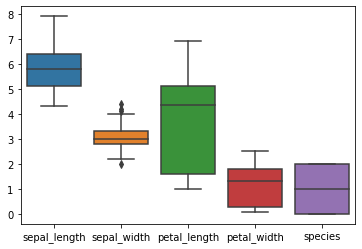

In [9]:
import seaborn as sns 
sns.boxplot(data =iris) #크게 벗어나는 값 없음.

In [10]:
iris['petal_area'] = iris['petal_length']*iris['petal_width'] #적은 feature 보완하기 위해 '꽃잎 크기' column  생성 

### 데이터 시각화

Text(0, 0.5, 'width')

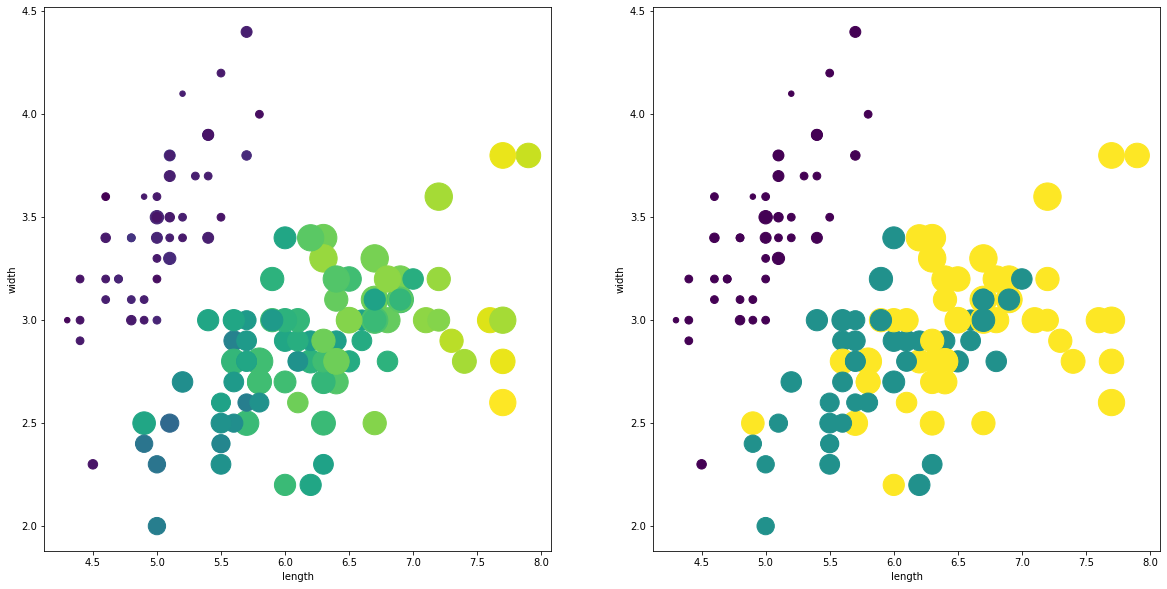

In [11]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1,2, figsize = (20,10))
axes[0].scatter(iris.sepal_length, iris.sepal_width, alpha = 10, s =  iris['petal_width']*300, c = iris['petal_length'])
axes[0].set_xlabel('length')
axes[0].set_ylabel('width')
axes[1].scatter(iris.sepal_length, iris.sepal_width, alpha = 10, s =  iris['petal_width']*300, c = iris['species'])
axes[1].set_xlabel('length')
axes[1].set_ylabel('width') 

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

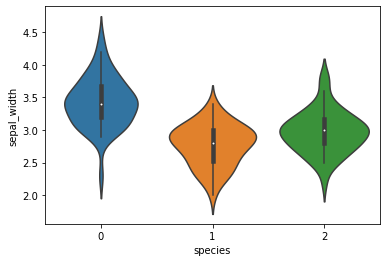

In [12]:
sns.violinplot(data = iris, x = iris['species'], y = iris['sepal_width'])

<AxesSubplot:xlabel='species', ylabel='petal_area'>

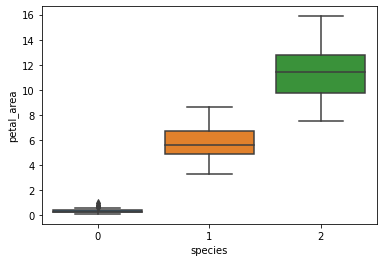

In [13]:
sns.boxplot(data = iris, x = iris['species'], y = iris['petal_area'])

<AxesSubplot:>

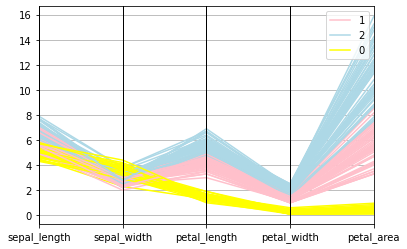

In [14]:
from pandas.plotting import parallel_coordinates as pc
pc(iris, 'species', color = ['pink', 'lightblue', 'yellow'])

In [15]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,petal_area
species,,,,,
0,5.006,3.428,1.462,0.246,0.3656
1,5.936,2.770,4.260,1.326,5.7204
2,6.588,2.974,5.552,2.026,11.2962


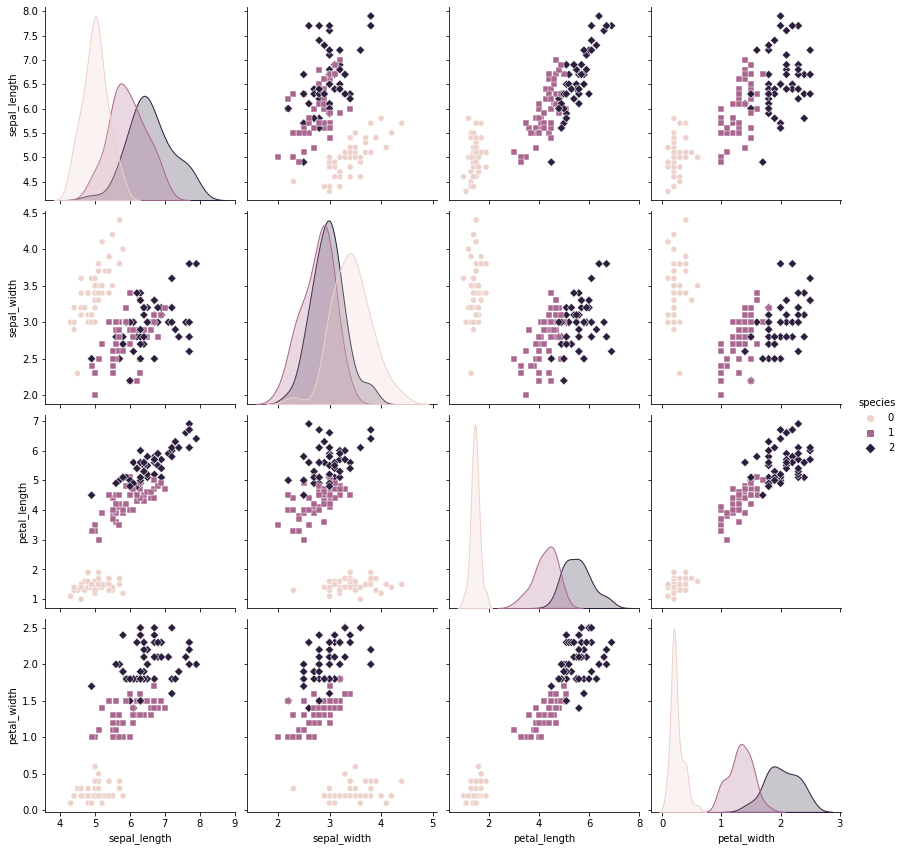

In [16]:
sns.pairplot(iris.drop("petal_area", axis=1), hue = "species", size=3, markers=["o", "s", "D"])

In [17]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
0,6.1,3.0,4.6,1.4,1,6.44
1,7.7,2.6,6.9,2.3,2,15.87
2,6.0,2.2,4.0,1.0,1,4.00
3,4.8,3.0,1.4,0.3,0,0.42
4,4.8,3.1,1.6,0.2,0,0.32
...,...,...,...,...,...,...
145,5.9,3.0,4.2,1.5,1,6.30
146,5.8,4.0,1.2,0.2,0,0.24
147,5.5,2.3,4.0,1.3,1,5.20
148,7.4,2.8,6.1,1.9,2,11.59


## 모델 훈련

In [18]:
iris_features = iris.drop('species', axis=1)
iris_label = iris['species']

In [19]:
X_test, y_test = iris_features.iloc[:37], iris_label.iloc[:37]
X_train, y_train = iris_features.iloc[37:], iris_label.iloc[37:]

### KNN 평균

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_train, y_train)

KMeans(n_clusters=3)

In [21]:
kmeans_prediction = kmeans.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, confusion_matrix
def predict_(test,pred):
    c = confusion_matrix(test, pred)
    a = accuracy_score(test,pred)
    p = precision_score(test,pred,average='micro')
    r = recall_score(test,pred,average='micro')
    print(c)
    print('정확도는 {0:.4f}%, 정밀도는: {1:.4f}% 재현율은: {2:.4f}%'
          .format(a, p, r))


In [48]:
predict_(y_test, kmeans_prediction)

[[ 0  0 10]
 [ 0 13  0]
 [13  1  0]]
정확도는 0.3514%, 정밀도는: 0.3514% 재현율은: 0.3514%


In [52]:
kmeans_prediction

array([1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0])

In [56]:
np.array(y_test)

array([1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 2])

###### label 중 0과 2가 바뀜;;; 왜지? 두시간 고민했는데 전혀 모르겠음.

### 선형 모델

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

In [50]:
predict_(y_test, lr_prediction)

[[10  0  0]
 [ 0 12  1]
 [ 0  0 14]]
정확도는 0.9730%, 정밀도는: 0.9730% 재현율은: 0.9730%


### 결정트리

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

In [58]:
predict_(y_test, dt_prediction)

[[10  0  0]
 [ 0 12  1]
 [ 0  0 14]]
정확도는 0.9730%, 정밀도는: 0.9730% 재현율은: 0.9730%
